# HR EMPLOYEE ATTRITION

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## import file

In [150]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [151]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [153]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### drop ข้อมูลซ้ำ

In [154]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis = 1,inplace = True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Data Cleaning

### Attrition

In [156]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [157]:
order = ['No','Yes']
OE = OrdinalEncoder( categories = [order])

In [158]:
df['Attrition'] = OE.fit_transform(df[['Attrition']] )df['Attrition'].astype('Int64')

In [212]:
df['Attrition'].astype('Int64')

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: Int64

In [159]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


### BusinessTravel

In [160]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [161]:
order = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
OE = OrdinalEncoder(categories=[order])

In [162]:
df['BusinessTravel'] = OE.fit_transform(df[['BusinessTravel']])

In [163]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,0.0,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,0.0,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,0.0,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


### Department

In [164]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [165]:
OHE = OneHotEncoder( handle_unknown='ignore' , sparse_output= False ).set_output( transform = 'pandas' )
OHE_df = OHE.fit_transform(df[['Department']])

In [166]:
df = pd.concat( [df,OHE_df] ,axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1.0,0.0,1102,Sales,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,0.0,0.0,1.0
1,49,0.0,1.0,279,Research & Development,8,1,Life Sciences,2,3,...,10,3,3,10,7,1,7,0.0,1.0,0.0
2,37,1.0,0.0,1373,Research & Development,2,2,Other,4,4,...,7,3,3,0,0,0,0,0.0,1.0,0.0
3,33,0.0,1.0,1392,Research & Development,3,4,Life Sciences,5,4,...,8,3,3,8,7,3,0,0.0,1.0,0.0
4,27,0.0,0.0,591,Research & Development,2,1,Medical,7,1,...,6,3,3,2,2,2,2,0.0,1.0,0.0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   object 
 11  HourlyRate                         1470 non-null   int64

### EducationField

In [168]:
OHE = OneHotEncoder( handle_unknown='ignore' , sparse_output= False ).set_output( transform = 'pandas' )
OHE_df = OHE.fit_transform(df[['EducationField']])

In [169]:
df = pd.concat([df,OHE_df] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1.0,0.0,1102,Sales,1,2,Life Sciences,1,2,...,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,0.0,1.0,279,Research & Development,8,1,Life Sciences,2,3,...,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,1.0,0.0,1373,Research & Development,2,2,Other,4,4,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0.0,1.0,1392,Research & Development,3,4,Life Sciences,5,4,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,0.0,0.0,591,Research & Development,2,1,Medical,7,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   object 
 11  HourlyRate                         1470 non-null   int64

### Gender

In [171]:
order = ['Female','Male']
OE = OrdinalEncoder( categories = [order])
df['Gender'] = OE.fit_transform(df[['Gender']] )

In [172]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1.0,0.0,1102,Sales,1,2,Life Sciences,1,2,...,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,0.0,1.0,279,Research & Development,8,1,Life Sciences,2,3,...,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,1.0,0.0,1373,Research & Development,2,2,Other,4,4,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0.0,1.0,1392,Research & Development,3,4,Life Sciences,5,4,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,0.0,0.0,591,Research & Development,2,1,Medical,7,1,...,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   float64
 11  HourlyRate                         1470 non-null   int64

### Overtime

In [174]:
order = ['Yes','No']
OE = OrdinalEncoder( categories = [order])
df['OverTime'] = OE.fit_transform(df[['OverTime']] )

In [175]:
df['OverTime']

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
1465    1.0
1466    1.0
1467    0.0
1468    1.0
1469    1.0
Name: OverTime, Length: 1470, dtype: float64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   float64
 11  HourlyRate                         1470 non-null   int64

### JobRole

In [177]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [178]:
OHE = OneHotEncoder( handle_unknown='ignore' , sparse_output= False ).set_output( transform = 'pandas' )
OHE_df = OHE.fit_transform(df[['JobRole']])

In [179]:
df = pd.concat([df,OHE_df] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1.0,0.0,1102,Sales,1,2,Life Sciences,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49,0.0,1.0,279,Research & Development,8,1,Life Sciences,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,1.0,0.0,1373,Research & Development,2,2,Other,4,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,0.0,1.0,1392,Research & Development,3,4,Life Sciences,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,0.0,0.0,591,Research & Development,2,1,Medical,7,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   float64
 11  HourlyRate                         1470 non-null   int64

### MaritalStatus

In [181]:
order = ['Single','Married','Divorced']
OE = OrdinalEncoder( categories = [order])
df['MaritalStatus'] = OE.fit_transform(df[['MaritalStatus']] )

In [182]:
df['MaritalStatus']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1465    1.0
1466    1.0
1467    1.0
1468    1.0
1469    1.0
Name: MaritalStatus, Length: 1470, dtype: float64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   float64
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   object 
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int64  
 7   EducationField                     1470 non-null   object 
 8   EmployeeNumber                     1470 non-null   int64  
 9   EnvironmentSatisfaction            1470 non-null   int64  
 10  Gender                             1470 non-null   float64
 11  HourlyRate                         1470 non-null   int64

### --------------------------------------------------------------------------------------------------------------

In [211]:
df['Attrition'].value_counts()

Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

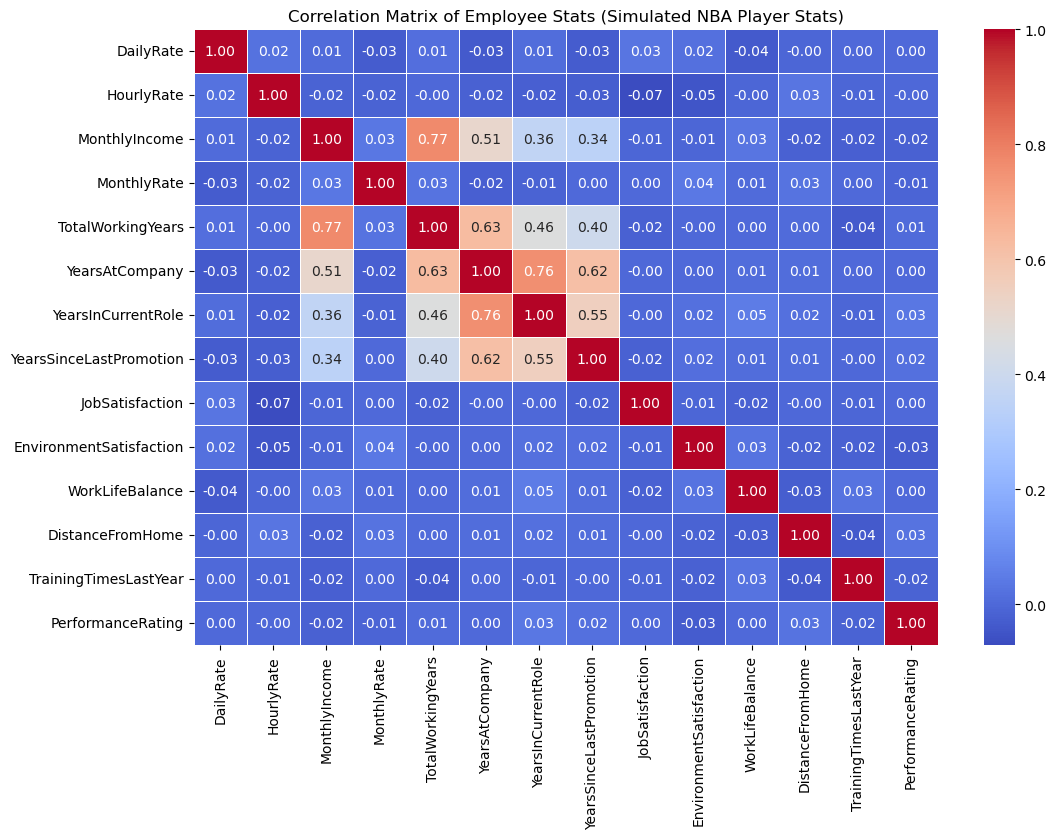

In [184]:
HR_features = [
    'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',  # รายได้
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',  # ประสบการณ์ทำงาน
    'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance',  # ความพึงพอใจ
    'DistanceFromHome', 'TrainingTimesLastYear', 'PerformanceRating'  # ปัจจัยอื่น ๆ
]

# คำนวณ Correlation Matrix
HR_corr_matrix = df[HR_features].dropna().corr()

# วาด Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(HR_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Employee Stats (Simulated NBA Player Stats)")
plt.show()

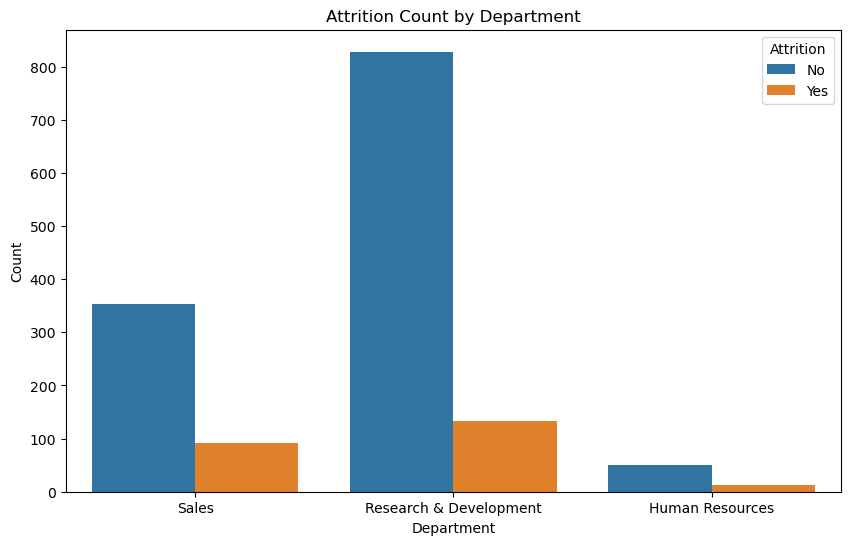

In [185]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition Count by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

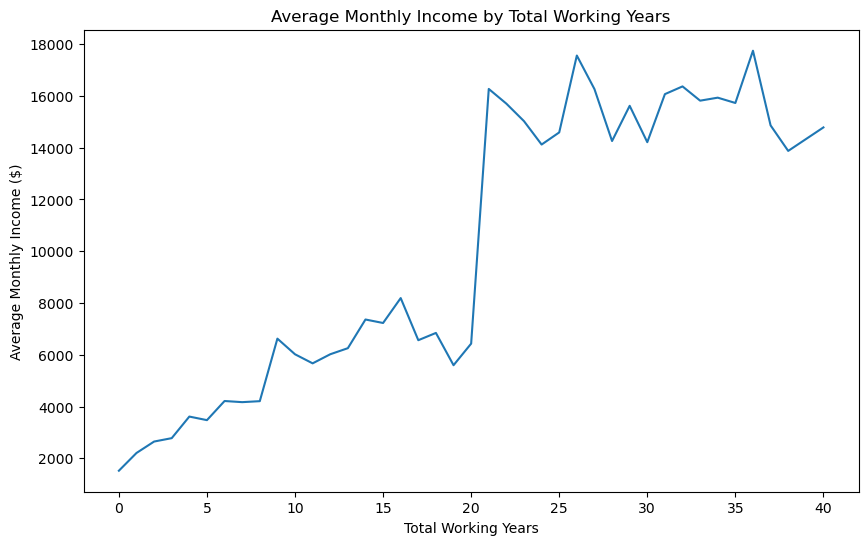

In [186]:
avg_salary_by_experience = df.groupby("TotalWorkingYears")["MonthlyIncome"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values)
plt.title("Average Monthly Income by Total Working Years")
plt.xlabel("Total Working Years")
plt.ylabel("Average Monthly Income ($)")
plt.show()

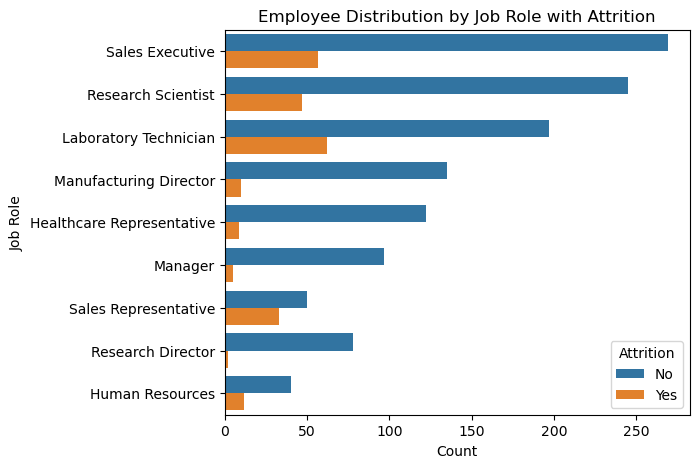

In [189]:
plt.figure(figsize=(6,5))
sns.countplot(y="JobRole", hue="Attrition", data=df, order=df["JobRole"].value_counts().index)
plt.title("Employee Distribution by Job Role with Attrition")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

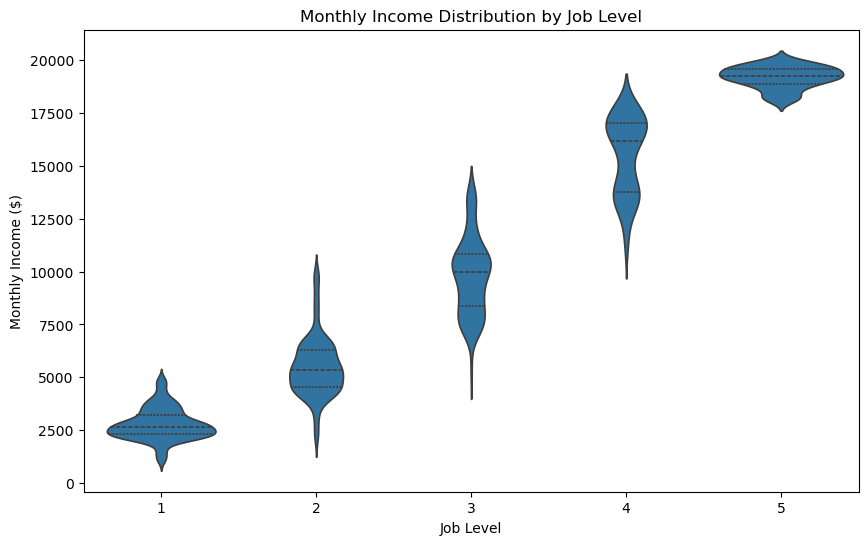

In [190]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="JobLevel", y="MonthlyIncome", data=df, inner="quartile")
plt.title("Monthly Income Distribution by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income ($)")
plt.show()

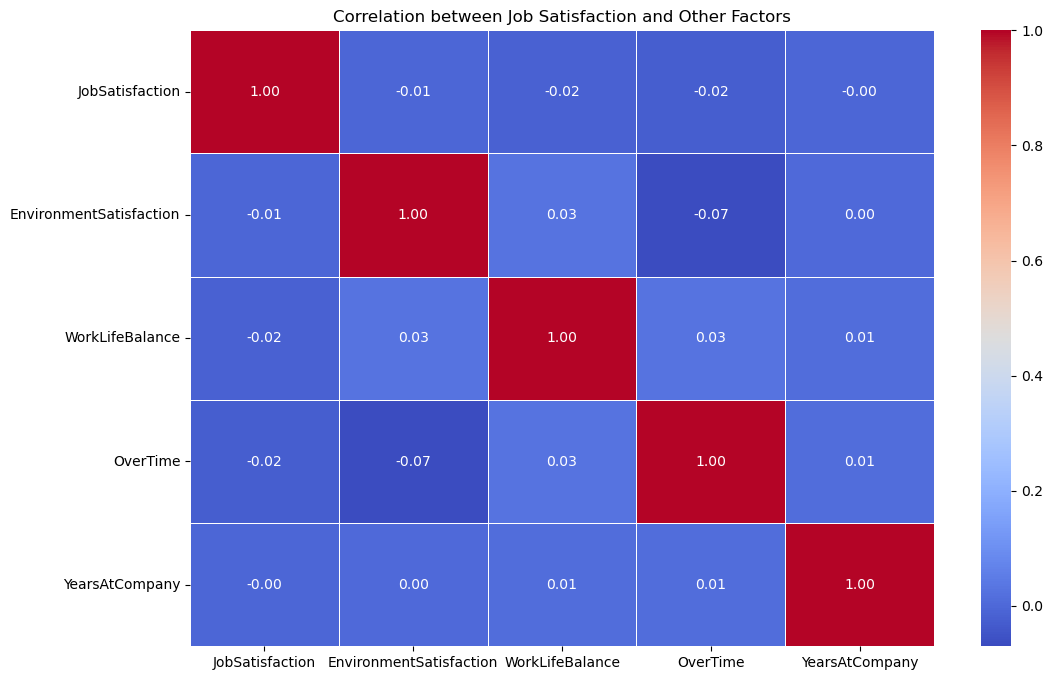

In [191]:
plt.figure(figsize=(12, 8))
satisfaction_features = ["JobSatisfaction", "EnvironmentSatisfaction", "WorkLifeBalance", "OverTime", "YearsAtCompany"]
sns.heatmap(df[satisfaction_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Job Satisfaction and Other Factors")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12536\3261491192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_avg_income.index, x=df_avg_income.values, palette="coolwarm", hue=None, legend=False)


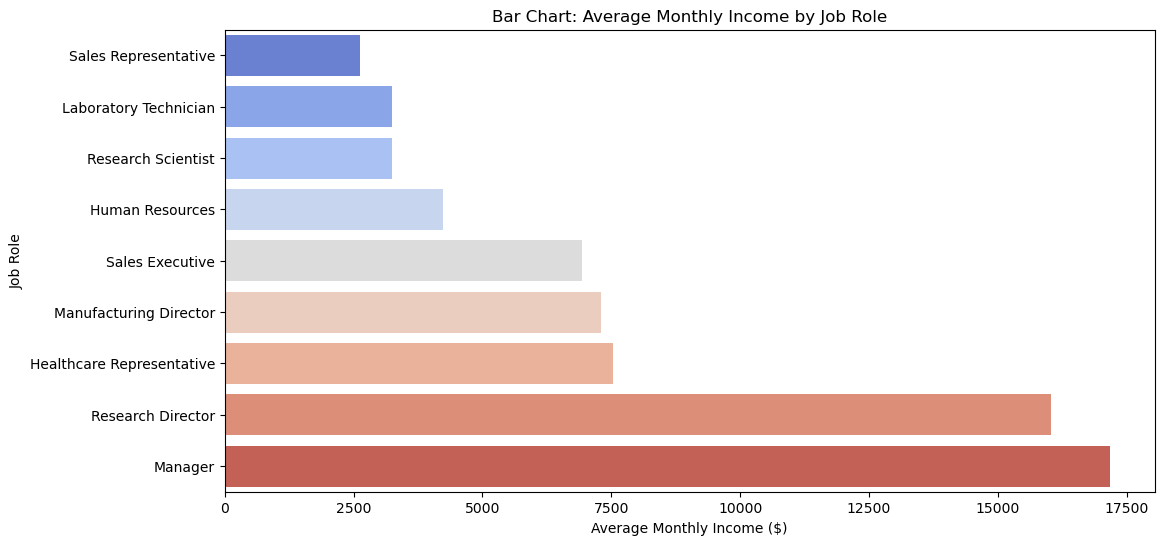

In [192]:
plt.figure(figsize=(12, 6))
df_avg_income = df.groupby("JobRole")["MonthlyIncome"].mean().sort_values()
sns.barplot(y=df_avg_income.index, x=df_avg_income.values, palette="coolwarm", hue=None, legend=False)
plt.title("Bar Chart: Average Monthly Income by Job Role")
plt.xlabel("Average Monthly Income ($)")
plt.ylabel("Job Role")
plt.show()

## KMean(descriptive)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


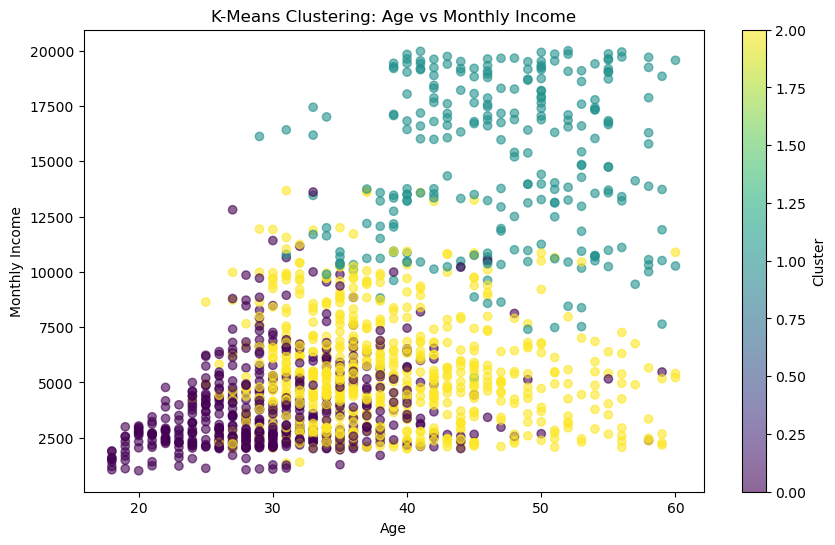

K-Means Clustering completed with 3 clusters.


In [207]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ตั้งค่าตัวแปรเพื่อลดปัญหา Memory Leak บน Windows
os.environ["OMP_NUM_THREADS"] = "6"

# Load Dataset
file_path = "HR2e.csv"
df = pd.read_csv(file_path)

# เลือกฟีเจอร์ที่สำคัญสำหรับการจัดกลุ่ม
features = ["Age", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "WorkLifeBalance", "JobSatisfaction", "YearsAtCompany"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ใช้ K-Means Clustering พร้อมแก้ไขปัญหา Memory Leak
num_clusters = 3  # กำหนดจำนวนกลุ่ม
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

# เพิ่มผลลัพธ์ของ Cluster เข้าไปใน DataFrame
df["KMeans_Cluster"] = kmeans_labels

# แสดง Scatter Plot ของการจัดกลุ่ม
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["MonthlyIncome"], c=df["KMeans_Cluster"], cmap='viridis', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("K-Means Clustering: Age vs Monthly Income")
plt.colorbar(label="Cluster")
plt.show()

print(f"K-Means Clustering completed with {num_clusters} clusters.")

In [201]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ตั้งค่าตัวแปรเพื่อลดปัญหา Memory Leak บน Windows
os.environ["OMP_NUM_THREADS"] = "6"

# Load Dataset
file_path = "HR2e.csv"
df = pd.read_csv(file_path)

# เลือกฟีเจอร์ที่สำคัญสำหรับการจัดกลุ่ม
features = ["Age", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "WorkLifeBalance", "JobSatisfaction", "YearsAtCompany"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ใช้ K-Means Clustering พร้อมแก้ไขปัญหา Memory Leak
num_clusters = 3  # กำหนดจำนวนกลุ่ม
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

# เพิ่มผลลัพธ์ของ Cluster เข้าไปใน DataFrame
df["KMeans_Cluster"] = kmeans_labels

# บันทึกเฉพาะคอลัมน์ที่จำเป็นรวมถึง Cluster
columns_to_save = features + ["KMeans_Cluster"]
df[columns_to_save].to_csv("hr_kmeans_results.csv", index=False)
print(f"K-Means Clustering completed. Results saved to hr_kmeans_results.csv with {num_clusters} clusters.")


K-Means Clustering completed. Results saved to hr_kmeans_results.csv with 3 clusters.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


## KNeighbors(predict)

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset
file_path = "HR2.csv"
df = pd.read_csv(file_path)

# ตรวจสอบว่ามีคอลัมน์ Attrition หรือไม่
if "Attrition" not in df.columns:
    raise ValueError("Dataset ไม่มีคอลัมน์ Attrition สำหรับการพยากรณ์")

# แปลงค่าของ Attrition (Yes/No) ให้เป็นตัวเลข
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])

# เลือกฟีเจอร์ที่สำคัญสำหรับการพยากรณ์
features = ["Age", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "JobSatisfaction", "YearsAtCompany", "OverTime", "YearsSinceLastPromotion"]
X = df[features]
y = df["Attrition"]

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# แบ่ง Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# สร้างและ Train โมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ทำนายผลลัพธ์
y_pred = knn.predict(X_test)

predictions = []
mae_results = []
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv("./nba_predictions_per_feature.csv", index=False)

# Save MAE results to CSV
mae_df = pd.DataFrame(mae_results)
mae_df.to_csv("./nba_mae_results_per_feature.csv", index=False)
# ประเมินโมเดล
accuracy = accuracy_score(y_test, y_pred)
## report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
## print("Classification Report:\n", report)

Accuracy: 0.8469
